*data and tutorial provided by [Cloud Academy](https://github.com/cloudacademy/data-visualization-with-python-using-matplotlib)*
# $Data$ $Visualization$ $with$ $Python$

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from wrapper_plot import *

%matplotlib inline

## Part One: Introduction to Matplotlib

* Use the pandas.read_csv() method to load the gapminder.csv as a dataframe df
* Create a new dataset of df_usa by querying df to only include data from the USA
* Plot the df_usa dataset with 'Year' as the x-axis and 'GDP' as the y-axis

In [2]:
df = pd.read_csv('./data/gapminder.csv')
df_usa = df.query("Country == 'United States'").reset_index(drop=True)

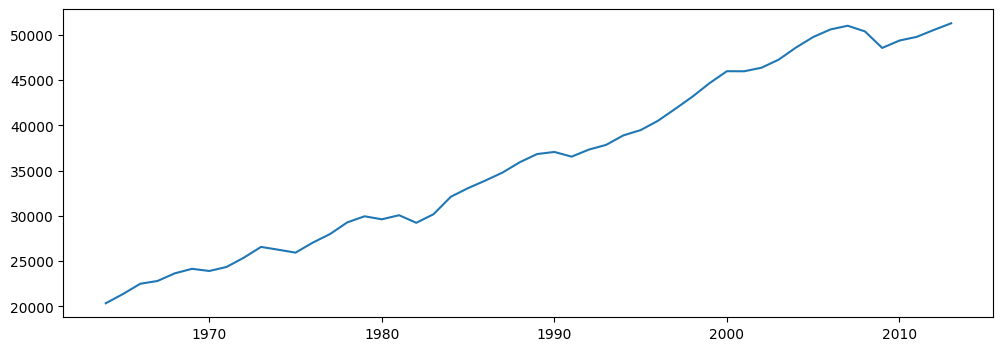

In [3]:
fig, ax = plt.subplots(figsize=[12, 4])
ax.plot(df_usa['Year'], df_usa['gdp'])
plt.show()

## Part Two: Customisation in Matplotlib

* Change the linestyle of the df_usa plot to be red dashes and add a label of 'USA'
* Change the xticks (markers on the x-axis) to be every 6 years
* Add labels to each axis as well as a title
* Add a legend to the plot

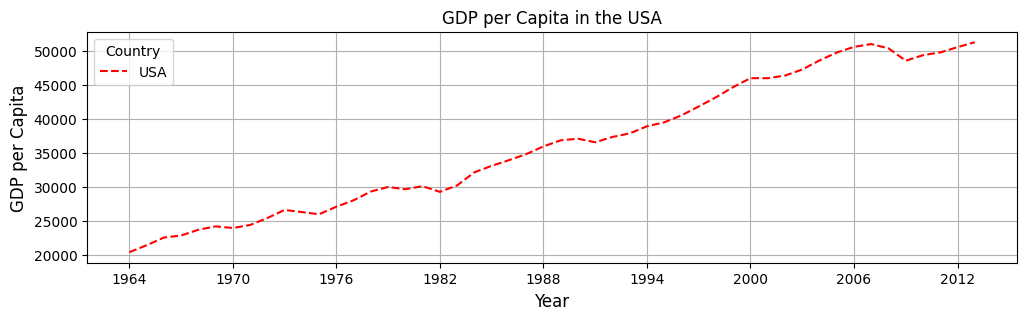

In [4]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.plot(df_usa['Year'], df_usa['gdp'], linestyle='--', color='r', label='USA')
ax.set_xticks(
    list(range(df_usa['Year'].min(), df_usa['Year'].max()+1, 6))
)
ax.set_xlabel('Year', fontdict={'size': 12})
ax.set_ylabel('GDP per Capita', fontdict={'size': 12})
ax.set_title('GDP per Capita in the USA')
ax.legend(title='Country')
plt.grid(True)
plt.show()

## Part Three: Multiple Plots

* Create a new dataset df_china from df including only data from China
* Plot the df_china dataset alongside the df_usa dataset as seperate rows of the same plot, each with their own labels, legend, and line style
* Plot df_usa and df_china on the same plot but with seperate scales on the y-axis
* Create a legend for this new figure indicating which line relates to which country

In [5]:
df_china = df.query("Country == 'China'").reset_index(drop=True)

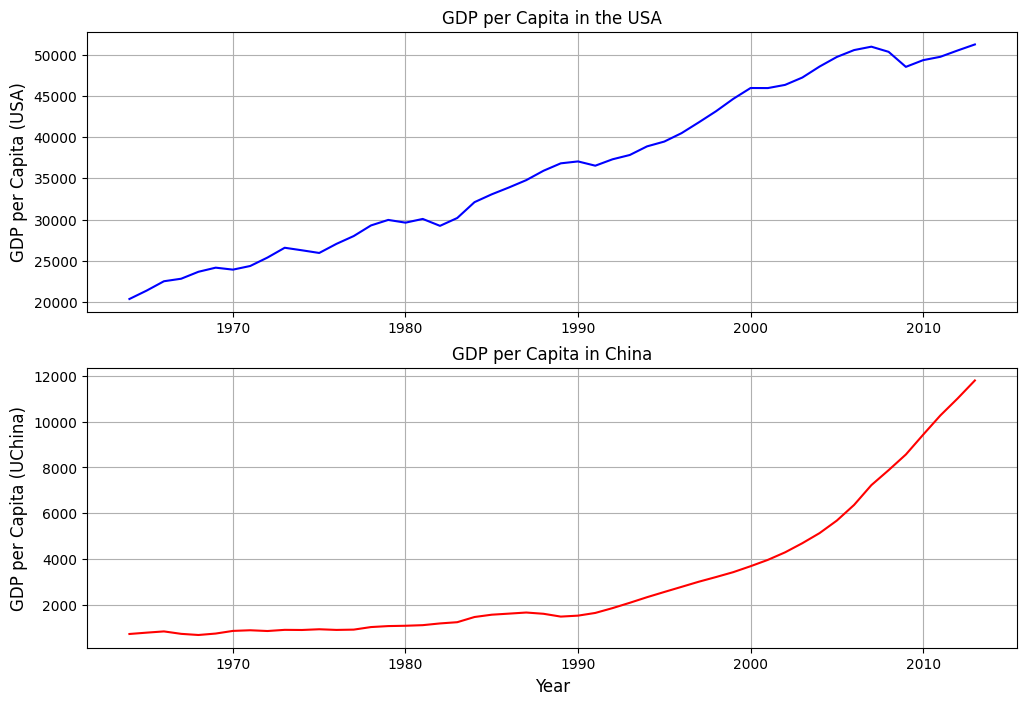

In [6]:
fig, ax = plt.subplots(figsize=[12, 8], nrows=2, ncols=1)
ax[0].plot(df_usa['Year'], df_usa['gdp'], linestyle='-', color='b', label='USA')
ax[1].plot(df_china['Year'], df_china['gdp'], linestyle='-', color='r', label='China')
ax[1].set_xlabel('Year', fontdict={'size': 12})
ax[0].set_ylabel('GDP per Capita (USA)', fontdict={'size': 12})
ax[1].set_ylabel('GDP per Capita (UChina)', fontdict={'size': 12})
ax[0].set_title('GDP per Capita in the USA')
ax[1].set_title('GDP per Capita in China')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

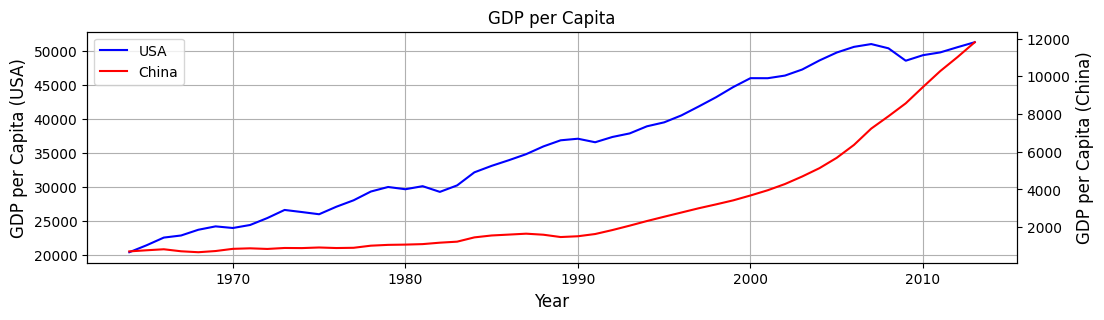

In [7]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.plot(df_usa['Year'], df_usa['gdp'], linestyle='-', color='b', label='USA')
ax.set_xlabel('Year', fontdict={'size': 12})
ax.set_ylabel('GDP per Capita (USA)', fontdict={'size': 12})
ax.set_title('GDP per Capita')
ax2 = ax.twinx()
ax2.plot(df_china['Year'], df_china['gdp'], linestyle='-', color='r', label='China')
ax2.set_ylabel('GDP per Capita (China)', fontdict={'size': 12})
ax.grid(True)
lines, handles = ax.get_legend_handles_labels()
lines2, handles2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, handles + handles2)
plt.show()

## Part Four: Annotating Text

* Using the wrapper_plot.getting_series_plot() method, plot the ferility per year for df_china
* Add text to the plot explaining the sudden drop in FTR in 1970
* Add an arrow to clarify where on the plot the text refers
* Add a second arrow with text explaining the second FTR drop in 1980

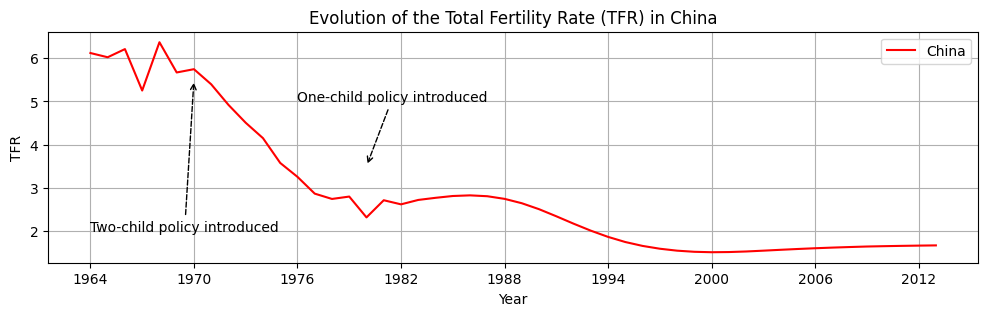

In [22]:
fig, ax = plt.subplots(figsize=[12, 3])
axes = getting_series_plot(
    x=df_china['Year'],
    y=df_china['fertility'],
    axes=ax,
    xlabel='Year',
    ylabel='TFR',
    xticks_grid=6,
    color='r',
    plot_label='China',
    title='Evolution of the Total Fertility Rate (TFR) in China'
)
axes.annotate(
    "Two-child policy introduced", 
    xy=[1970, 5.5], 
    xytext=(1964, 2), 
    arrowprops={
        'arrowstyle': '->',
        'color': 'black',
        'linestyle': '--'
    }
    )
axes.annotate(
    "One-child policy introduced",
    xy=[1980, 3.5],
    xytext=(1976, 5),
    arrowprops={
        'arrowstyle': '->',
        'color':'black',
        'linestyle':'--'
    }
)
ax.grid(True)
plt.show()

## Part Five: Advanced Customisation

* Using the mpl.rcParams file, change the default figsize to 12 x 3
* Using the plt.styles.context() method, recreate the graph from Part Four in the 'seaborn' style
* Save this new figure in the figs directory as china_tfr_styled.png

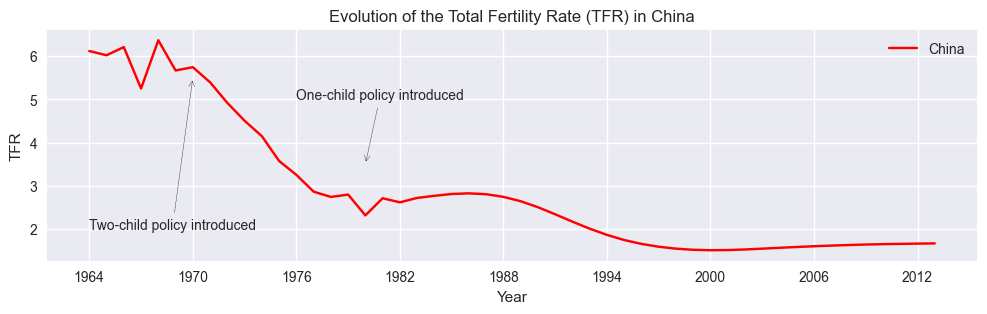

In [27]:
mpl.rcParams['figure.figsize']=(12, 3)
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=[12, 3])
    axes = getting_series_plot(
        x=df_china['Year'],
        y=df_china['fertility'],
        axes=ax,
        xlabel='Year',
        ylabel='TFR',
        xticks_grid=6,
        color='r',
        plot_label='China',
        title='Evolution of the Total Fertility Rate (TFR) in China'
    )
    axes.annotate(
        "Two-child policy introduced", 
        xy=[1970, 5.5], 
        xytext=(1964, 2), 
        arrowprops={
            'arrowstyle': '->',
            'color': 'black',
            'linestyle': '--'
        }
        )
    axes.annotate(
        "One-child policy introduced",
        xy=[1980, 3.5],
        xytext=(1976, 5),
        arrowprops={
            'arrowstyle': '->',
            'color':'black',
            'linestyle':'--'
        }
    )
    ax.grid(True)
    plt.show()

In [29]:
fig.savefig('./figs/china_tfr_styled.png')

## Part Six: Different Plot Types

* Using the fifa20_players_stats.csv file, create a dataset showing the number of players by country
* Sort this new dataset by $n$ in ascending order, and assign the top 10 countries to the variable top_10
* Creating a box chart to show the top_10 data
* Repeat for the top 50 countries, rotating the xticks so the labels remain visable
* Create a histogram to show the distribution of overall skill of players
* Create a histogram to show the distribution of overall skill of players in England compared to Italy and Spain
* Recreate the above histogram with a histtype of step

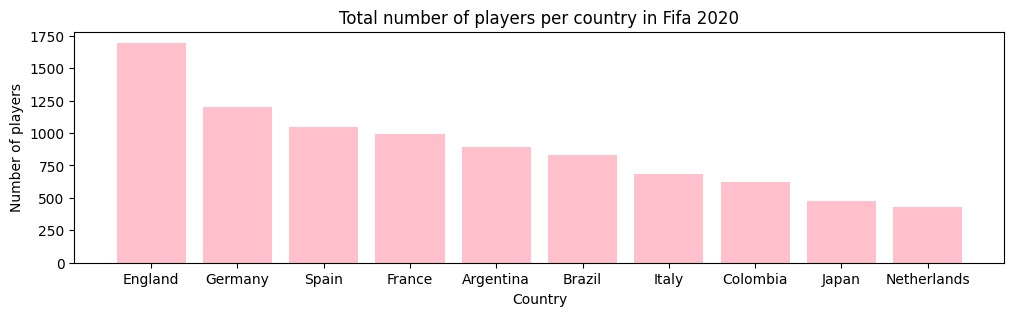

In [46]:
data = pd.read_csv('./data/fifa20_players_stats.csv', index_col=0, usecols=[x for x in range(74)])
countries_count = data[['Country', 'Name']].groupby('Country').count().rename(columns={'Name': 'n'})
countries = countries_count.sort_values(by='n', ascending=False)
top_10 = countries.head(10)
fig, ax = plt.subplots(figsize=[12, 3])
ax.bar(top_10.index,  top_10['n'], color='pink')
ax.set_ylabel("Number of players")
ax.set_xlabel("Country")
ax.set_title("Total number of players per country in Fifa 2020")
plt.show()

C:\Users\EmmyB.000\AppData\Local\Temp\ipykernel_11724\1109993578.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_50.index, rotation=90)


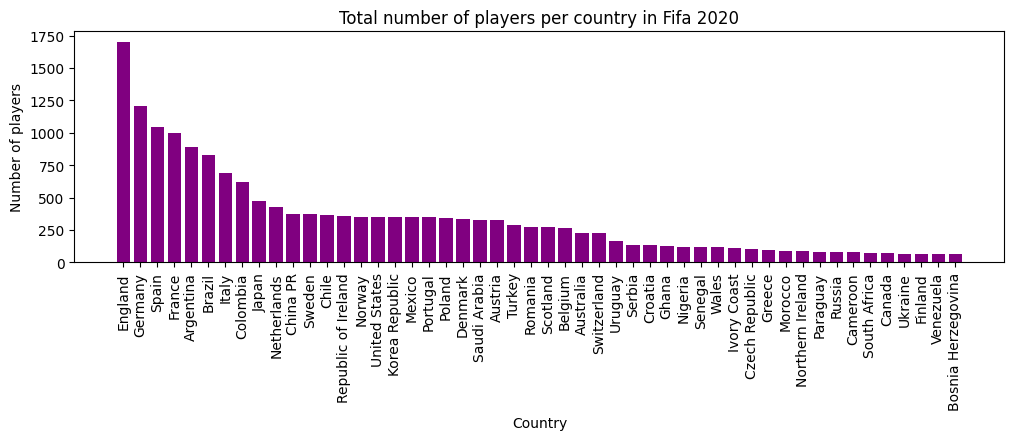

In [48]:
data = pd.read_csv('./data/fifa20_players_stats.csv', index_col=0, usecols=[x for x in range(74)])
countries_count = data[['Country', 'Name']].groupby('Country').count().rename(columns={'Name': 'n'})
countries = countries_count.sort_values(by='n', ascending=False)
top_50 = countries.head(50)
fig, ax = plt.subplots(figsize=[12, 3])
ax.bar(top_50.index,  top_50['n'], color='purple')
ax.set_ylabel("Number of players")
ax.set_xlabel("Country")
ax.set_xticklabels(top_50.index, rotation=90)
ax.set_title("Total number of players per country in Fifa 2020")
plt.show()

In [67]:
def normalize_data(df):
    normalized_df = (df['Overall'] - df['Overall'].mean())/df['Overall'].std()
    normalized_df = normalized_df[~normalized_df.isna()].to_frame()
    return normalized_df

dist = normalize_data(data)

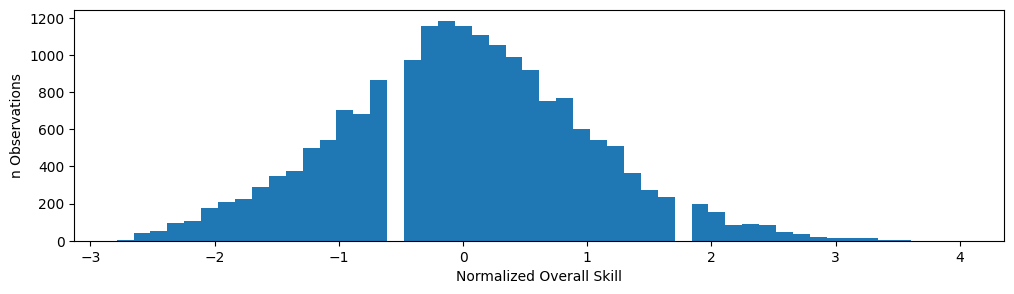

In [68]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.hist(dist['Overall'], label='Overall Skill', bins=50)
ax.set_xlabel('Normalized Overall Skill')
ax.set_ylabel('n Observations')
plt.show()

In [76]:
england = data.query("Country=='England'").reset_index(drop=True)
italy = data.query("Country=='Italy'").reset_index(drop=True)
spain = data.query("Country=='Spain'").reset_index(drop=True)

en = normalize_data(england)
it = normalize_data(italy)
sp = normalize_data(spain)

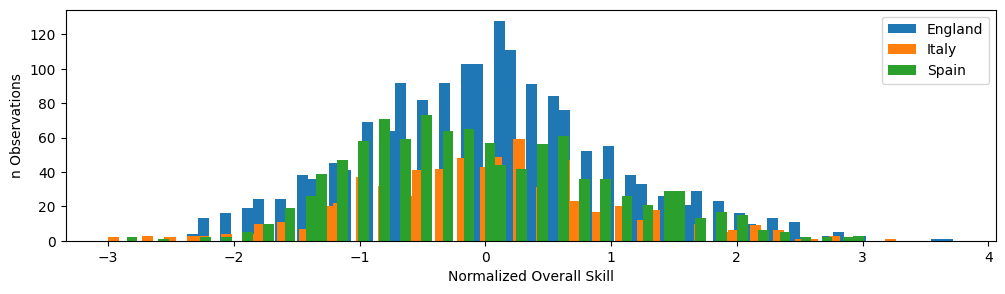

In [78]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.hist(en['Overall'], label='England', bins=70)
ax.hist(it['Overall'], label='Italy', bins=70)
ax.hist(sp['Overall'], label='Spain', bins=70)
ax.set_xlabel("Normalized Overall Skill")
ax.set_ylabel("n Observations")
ax.legend()
plt.show()

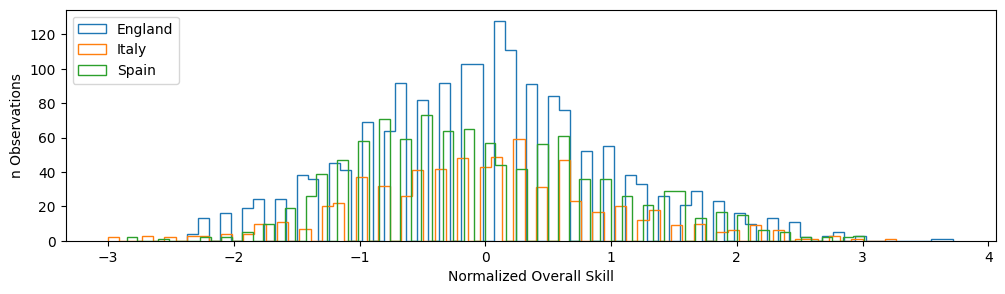

In [80]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.hist(en['Overall'], label='England', bins=70, histtype='step')
ax.hist(it['Overall'], label='Italy', bins=70, histtype='step')
ax.hist(sp['Overall'], label='Spain', bins=70, histtype='step')
ax.set_xlabel("Normalized Overall Skill")
ax.set_ylabel("n Observations")
ax.legend()
plt.show()